## ifo Business Survey challenge

> In the ifo Business Survey every month approximately 9,000 German firms are surveyed on their current situation (status quo), recent developments (ex-post), and their plans and expectations for the near future (ex-ante). 
>
> Build a model which predicts the categorical answers of firms on various questions in the next 12 months. This model can be based on past answers and/or firm-specific information in the micro data of the survey (e.g., firm-size, region, sector).

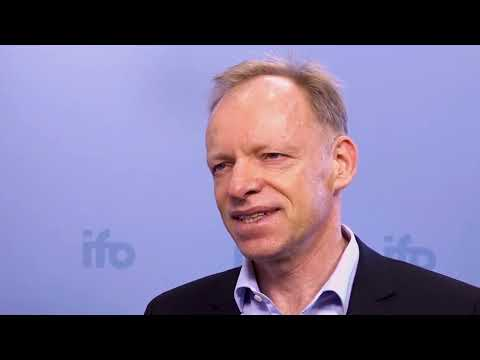

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('l9uFkSIjPuQ')

- The IBS is a panel survey, i.e. *multiple characteristics* of *multiple entitites* observed *over time*

- Each month about 9,000 persons from companies across different industries in Germany are asked the **same questions** (*'Standard questions'*) and sometimes *'Special questions'*

- 'Standard questions' guarantee *consistency* and *comparability*

- 'Special questions' can be used to investigate *certain shocks* (e.g. Covid-19)

- Microdata is weighted and aggregated to a single number, the *ifo Geschäftsklimaindex*

- Most important **business cycle indicator** in Germany

![Alt text](KT_animation_two_lines_15fps_final_level.gif)

![Alt text](KT_animation_two_lines_15fps_final.gif)

- Answer items are (almost) exclusively qualitative, i.e. admissible values are 

```python 
['Good', 'Neutral', 'Bad']
['Better', 'Neutral', 'Worse']
```

Make sure to treat them accordingly in your predictive model!

- The ifo Business Climate Index is a *net balance* index, expressing the (weighted) fraction difference of respondents within a specific group (=industry) who answered in the category with `Good` with respect to those who answered with `Bad`

- In this challenge we will focus on industrial production (= 'Verarbeitendes Gewerbe')

- Most important question items are `vg_statebus`, `vg_comexp` and `vg_priceexp`

In [1]:
english_filepath = "Variablenliste_KT_Verarbeitendes_Gewerbe_2021b_en.pdf"

In [ ]:
from IPython.display import IFrame, display
IFrame(english_filepath, width=980, height=800)

In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(42)
firm_id = random.choice(range(1, 13000))
answers = np.array(random.choices(range(1,4), k = 120))
x = np.arange(1,121)

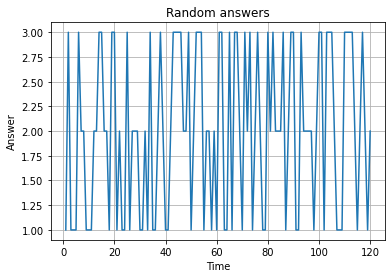

In [19]:
fig, ax = plt.subplots()
ax.plot(x, answers)

ax.set(xlabel='Time', ylabel='Answer',
       title='Random answers')
ax.grid()

plt.show()

#### Feature engineering

You will have many of those! Think about a way how to reduce complexity
- within a single time series of a firm (standardization, transformations, trends, ...)
- across single time series of a firm (correlations, ...)
- from interdependencies **across** firms (economic links, ...)

At a later stage, you can consider base data which is (almost) time-invariant in order to improve your classification algorithm.

#### Model building

The goal is to predict categorical answers **at the firm level** over a period of 12 months. The forecast period is `2022-01-01` to `2022-12-01` (YYYY-MM-DD), the day doesn't matter actually as the frequency is on a monthly basis.
Therefore, your predictions for each firm and month should include one of the three classes 
```python 
['Good', 'Neutral', 'Bad']
['Better', 'Neutral', 'Worse']
```
as integer values.

For each question item [`vg_statebus`, `vg_comexp`, `vg_priceexp`] one predictions vector is required.

#### Forecast provision

Please generate your predictions vectors according to the following scheme:

1. `year`
2. `month`
3. `idnum`
4. `vg_statebus`
5. `vg_comexp`
6. `vg_priceexp`

Save it in `.csv` format and place it in your `analysis` folder, we'll read it from there.
Name your `.csv` file according to `{teamname}_eval_submission.csv` and create a `{teamname}.json` in the same directory which should look like

```python
{
  "name": "suns",
  "members": ["Leo Messi", "Cristian Ronaldo"]
}
```

**You must strictly stick to the standardized submission format, otherwise your submission data cannot be processed!**

#### Forecast evaluation

Predictions will be evaluated on a single metric, the accuracy. It's simply the number of instances that were classified correctly and correspond to the same observed value on the test set for 2022. Firms and months are weighted equally. We'll provide a list of `idnum` for which we require predictions.

Each question item of [`vg_statebus`, `vg_comexp`, `vg_priceexp`] is evaluated separately and aggregated as an unweighted average of all three.
This average accuracy is the key indicator that is displayed on the leaderboard and is the main evaluation criterion in the competition.

In the leaderboard you'll see only part of the information from the evaluation:
- Only predictions for 50% of firms will be evaluated and made public
- The other 50% are held undisclosed until the Winners Announcement
That means even if a team leads on the public score, the private score (and thus overall score) will eventually determine the best model performance.

#### House keeping

1. Obtain your password for the GCP environment (request it over Slack from the challenge mentors)
2. Follow the steps outlined in the `./Cloud access/HowTo.md`
3. Open an IDE (VSCode recommended)
4. Complete the `./Cloud access/GiteaWorkflow.md`